# MATRIX INVERSE

## Left and right inverses

In [1]:
A = [-3 -4; 
     4 6;
     1 1]

3×2 Matrix{Int64}:
 -3  -4
  4   6
  1   1

In [104]:
# B is a left inverse of A
B = [-11 -10 16;
     7   8   -11]/9

2×3 Matrix{Float64}:
 -1.22222   -1.11111    1.77778
  0.777778   0.888889  -1.22222

In [105]:
# Confirm if B is a left inverse of A
# B*A = I ?
B*A

2×2 Matrix{Float64}:
  1.0          0.0
 -4.44089e-16  1.0

In [106]:
# Check if B is a left inverse of A
using LinearAlgebra
using VMLS
norm(B*A - eye(2))

6.280369834735101e-16

In [10]:
# C is another left inverse of A
C = [ 0 -1 6;
      0  1 -4]/2

2×3 Matrix{Float64}:
 0.0  -0.5   3.0
 0.0   0.5  -2.0

In [11]:
# How to check if C is a left inverse of A 
C*A

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

##  Inverse 

- If A is invertible, its inverse is given by inv(A)
- If A is invertible, its inverse is given by $ A^{-1}$
- we'll get an error if A is not invertible or not square

In [12]:
A = [
      1 -2  3;
      0  2  2;
     -4 -4 -4]

3×3 Matrix{Int64}:
  1  -2   3
  0   2   2
 -4  -4  -4

In [15]:
B = inv(A)

3×3 Matrix{Float64}:
  0.0  -0.5  -0.25
 -0.2   0.2  -0.05
  0.2   0.3   0.05

In [16]:
B*A 

3×3 Matrix{Float64}:
 1.0  0.0          0.0
 0.0  1.0          2.77556e-17
 0.0  5.55112e-17  1.0

In [17]:
C = A^-1

3×3 Matrix{Float64}:
  0.0  -0.5  -0.25
 -0.2   0.2  -0.05
  0.2   0.3   0.05

In [18]:
norm(C*A - eye(3))

2.3055512673781017e-16

# Dual basis

![](dual_basis.png)

In [19]:
A = [ 1  0  1; 
      4 -3 -4; 
      1 -1 -2]


3×3 Matrix{Int64}:
 1   0   1
 4  -3  -4
 1  -1  -2

In [20]:
B = inv(A)

3×3 Matrix{Float64}:
  2.0  -1.0   3.0
  4.0  -3.0   8.0
 -1.0   1.0  -3.0

In [21]:
x = [0.2, -0.3, 1.2]

3-element Vector{Float64}:
  0.2
 -0.3
  1.2

Find the coefficients to write $x$ as a linear combination of the columns of a

$
    x = (b_1^Tx)a_1 + (b_2^Tx)a_2+ ... + (b_n^Tx)a_n
$

In [23]:
lhs = x
rhs = (B[1,:]'*x)*A[:,1] + (B[2,:]'*x)*A[:,2] + (B[3,:]'*x)*A[:,3] 

3-element Vector{Float64}:
  0.1999999999999993
 -0.29999999999999716
  1.200000000000001

In [24]:
norm(lhs-rhs)

3.1254306387971657e-15

# Inverse via QR factorization

The inverse of a matrix A can be computed from 
its QR factorization

$ A = QR $ via the formula $ A^{-1} = R^{-1}Q^T $

In [27]:
A = randn(3, 3)

3×3 Matrix{Float64}:
  1.96586   -0.910454    1.23339
 -0.186074  -0.0875189   0.616234
 -0.093679   0.308271   -2.14874

In [29]:
inv(A)

3×3 Matrix{Float64}:
 -0.00575928   -4.74788  -1.36494
 -1.37833     -12.3767   -4.34068
 -0.197493     -1.56865  -1.02862

In [30]:
Q, R = qr(A)
R

3×3 Matrix{Float64}:
 -1.97687  0.911754  -1.27034
  0.0      0.316733  -2.15017
  0.0      0.0       -0.530169

In [32]:
Q = Matrix(Q)

3×3 Matrix{Float64}:
 -0.994432   -0.011921  0.104705
  0.0941254  -0.547269  0.831647
  0.0473875   0.836872  0.545344

In [33]:
inv(R)*Q'

3×3 Matrix{Float64}:
 -0.00575928   -4.74788  -1.36494
 -1.37833     -12.3767   -4.34068
 -0.197493     -1.56865  -1.02862

In [34]:
norm(inv(A) - inv(R)*Q')

7.554948578720741e-15

# Solving linear equations
**back substitution.** Let’s first implement back substitution (VMLS Algorithm 11.1)
in Julia, and check it. 

You won’t need this function, since Julia has a better implementation of it built in (via the backslash operation discussed below). We give
it here only to demonstrate that it works.

Solve $Rx = b$ using back substitution

![](back_subs.png)


In [48]:
function back_subst(R, b)
    n = length(b)
    x = zeros(n)
    for i=n:-1:1
        x[i] = b[i] - R[i, i+1:n]'* x[i+1:n]/ R[i, i]
    end
    return x
end

back_subst (generic function with 1 method)

In [37]:
A = randn(4,4)

4×4 Matrix{Float64}:
  0.22411   -0.470885  -0.877594  -0.623328
 -0.645652   1.0873    -1.94982   -1.80126
 -1.22015   -0.708362   0.198177   0.350255
 -1.48371   -0.277808   0.11922   -1.05283

In [39]:
Q, R = qr(A)
R

4×4 Matrix{Float64}:
 -2.03893  -0.229997  -0.315623  -1.05841
  0.0      -1.38925    1.40572    1.34177
  0.0       0.0        1.59681    1.11651
  0.0       0.0        0.0       -0.834892

In [40]:
# solve Rx = b for x
b = rand(4)

4-element Vector{Float64}:
 0.6644898748455509
 0.850841495210675
 0.662175816775654
 0.8423224318980186

In [47]:
x = back_subst(R, b)
norm(R*x - b)

1.9229626863835638e-16

In [ ]:
x = A \ b 

In [56]:
n = 5000
A = randn(n, n); b = randn(n)
@time x1 = A\b 

norm(b-A*x1)
@time x2 = inv(A)*b

norm(b-A*x2)

  0.357217 seconds (6 allocations: 190.811 MiB, 12.04% gc time)
  0.925109 seconds (8 allocations: 193.253 MiB)


1.4818968045130292e-9

In [52]:
n = 5000
b = randn(n)
A = tril(randn(n, n))
@time x = A\b
A = randn(n, n)

  0.009950 seconds (2 allocations: 39.172 KiB)


5000×5000 Matrix{Float64}:
  1.37938     -0.614611    1.22528    …   1.13395     0.34016   -0.601683
 -1.46164     -0.909759    1.40891        0.873356    0.869842  -0.835625
 -1.09063      0.748576    1.02737        0.857574    0.174573  -1.91339
 -0.334444     0.165908   -0.89364        1.13166     0.394626   1.89179
  0.672355    -0.918978   -0.0995172     -0.569785    1.46984    0.215955
 -0.501033    -0.250421   -0.539202   …  -1.10371    -0.407925   1.40946
  0.271616    -1.07117    -0.22299        0.637307    0.516581   0.361292
  0.463322     0.617477    0.134677       0.180315   -0.994497  -2.01459
  0.104552    -0.0588146  -1.63065        1.12963     0.624984   1.31492
 -0.725267    -0.366521   -1.25138       -0.707542   -0.424706  -0.40699
  ⋮                                   ⋱                         
  1.22101     -0.364304    0.146546      -0.230723    1.7541    -0.862269
 -1.49242     -0.44872     0.907014      -0.621835    0.352449  -1.32567
 -1.69517     -0.022543    

In [58]:
n = 5000
b = randn(n)
A = tril(randn(n,n))
@time x = A\b 
A = randn(n,n)
@time x = A\b 

  0.009131 seconds (2 allocations: 39.172 KiB)
  0.376712 seconds (6 allocations: 190.811 MiB, 14.17% gc time)
  0.038509 seconds (2 allocations: 78.172 KiB)
  2.329602 seconds (6 allocations: 763.092 MiB, 2.72% gc time)


10000-element Vector{Float64}:
 -0.3375658623154352
 -0.16076173610976582
 -0.21833019435659506
 -0.6143576633765911
 -0.9632967467040475
 -0.0997726656562144
 -1.040252469072594
 -0.3750675654873409
  0.7007496595758892
  0.04567616828946871
  ⋮
  0.40894697623216986
  0.6699300497136107
  0.007448892781992631
 -0.008080921727289513
  0.09796848093652533
  0.7551796903430819
  0.3628681690914783
 -0.11517237989578742
 -0.26508356944192557

In [62]:
n = 10000;
b = randn(n)
A = randn(n,n)
@time x = A\b; 

R = tril(A)
@time x2 = R\b; 

  2.294454 seconds (6 allocations: 763.092 MiB, 2.47% gc time)
  0.038854 seconds (2 allocations: 78.172 KiB)


In [64]:
@time Q, R = qr(A);

  8.589470 seconds (13 allocations: 1.495 GiB, 0.72% gc time)


In [66]:
@time y = inv(A);

  6.893316 seconds (6 allocations: 767.899 MiB, 0.85% gc time)


In [68]:
n = 5000
A =randn(n, n)
B = randn(n, 2)
@time x1 = A \ B[:,1]
@time x2 = A \ B[:, 2]
@time X = [A\B[:, 1] A\B[:, 2]]
@time X = A \ B

  0.327826 seconds (9 allocations: 190.850 MiB, 0.25% gc time)
  0.333192 seconds (9 allocations: 190.850 MiB, 2.69% gc time)
  0.723310 seconds (143.73 k allocations: 391.737 MiB, 7.55% gc time, 3.47% compilation time)
  0.374282 seconds (87.04 k allocations: 196.695 MiB, 1.31% gc time, 13.85% compilation time)


5000×2 Matrix{Float64}:
  0.38348     0.36291
 -0.977952    1.68532
 -0.0938504  -1.23185
  0.675811   -0.0302627
  0.180476    1.03094
 -0.439692   -0.141875
 -2.2124     -0.751557
  0.710627   -2.50156
 -0.166308    1.17376
 -1.27641     1.03231
  ⋮          
 -1.41616    -0.223664
  0.757042   -1.47566
 -0.421688   -1.86441
 -1.04705     1.31781
 -0.0437464   2.54997
  1.38531     0.312105
  0.382305   -2.02264
 -0.995893    0.807626
 -0.151676    2.41639

In [76]:
x = [-1.1, -0.4, 0.2, 0.8]
A = vandermonde(x, 4)
b1 = [-1.0, 1.3, 1.0, 0.5]
c = A\b1

using Printf
for i=1:4
    rhs = c[1]+c[2]*x[i] + c[3]*x[i]^2 + c[4]*x[i]^3
    @printf("y[%d] = %.3f\n", i, b1[i])
    @printf("c[1] + c[2]*x[%d] + c[3]*x[%d]^2 + c[4]*x[%d]^3 = %.3f\n", i, i, i, rhs)
    println("-"^60)
end

y[1] = -1.000
c[1] + c[2]*x[1] + c[3]*x[1]^2 + c[4]*x[1]^3 = -1.000
------------------------------------------------------------
y[2] = 1.300
c[1] + c[2]*x[2] + c[3]*x[2]^2 + c[4]*x[2]^3 = 1.300
------------------------------------------------------------
y[3] = 1.000
c[1] + c[2]*x[3] + c[3]*x[3]^2 + c[4]*x[3]^3 = 1.000
------------------------------------------------------------
y[4] = 0.500
c[1] + c[2]*x[4] + c[3]*x[4]^2 + c[4]*x[4]^3 = 0.500
------------------------------------------------------------


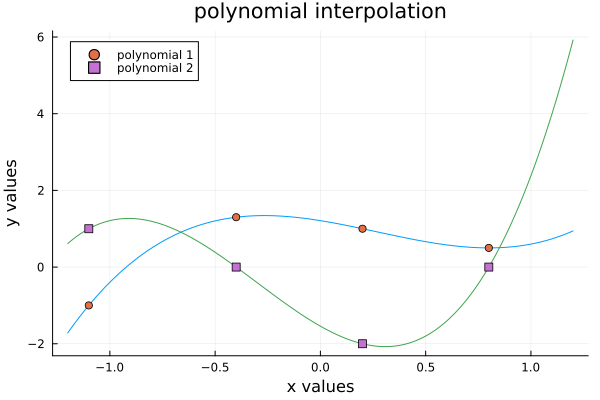

In [89]:
using Plots

xvalues = linspace(-1.2, 1.2, 1000)
yvalues = c[1] .+ c[2]*xvalues + c[3]*xvalues.^2 + c[4]*xvalues.^3
b2 = [1, 0, -2, 0]
cc = A\b2
y2values = cc[1] .+ cc[2]*xvalues + cc[3]*xvalues.^2 + cc[4]*xvalues.^3

plot(xvalues, yvalues, title="polynomial interpolation", label="")
scatter!(x, b1, label = "polynomial 1")
plot!(xvalues, y2values, label="")
scatter!(x, b2, label="polynomial 2", marker= :square, xlabel="x values", ylabel="y values")


# Pseudo-inverse
The pseudo inverse of a matrix A is obtained with **inv(A)**

We compute the pseudo inverse using the formula $ A^† = R^{-1}Q^T$
- where A = QR is the QR factorization of A
- The columns of $ A^† $ is computed by back substitution algorithm of $ Rx = Q^T $



In [91]:
A = [-3 -4;
      4  6;
      1  1]

3×2 Matrix{Int64}:
 -3  -4
  4   6
  1   1

In [92]:
B = pinv(A)

2×3 Matrix{Float64}:
 -1.22222   -1.11111    1.77778
  0.777778   0.888889  -1.22222

In [96]:
norm(B*A-eye(2))

1.5700924586837751e-15

In [97]:
Q, R = qr(A)
Q = Matrix(Q)

3×2 Matrix{Float64}:
 -0.588348  -0.457604
  0.784465  -0.522976
  0.196116   0.719092

In [98]:
R

2×2 Matrix{Float64}:
 5.09902   7.2563
 0.0      -0.588348

In [101]:
Adagger = R \ Q'

2×3 Matrix{Float64}:
 -1.22222   -1.11111    1.77778
  0.777778   0.888889  -1.22222

In [102]:
pinv(A)

2×3 Matrix{Float64}:
 -1.22222   -1.11111    1.77778
  0.777778   0.888889  -1.22222

In [103]:
norm(Adagger*A - eye(2))

6.137434987378955e-15